<a href="https://colab.research.google.com/github/ulisesjcaroflores/Lab2/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

avocado_clean = pd.read_csv('/content/avocado-updated-2020.csv')
avocado_clean.head()


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


**This dataset contains the sales of avocados across various U.S. markets over a certain time period ranging from 2014 - 2020. Other metrics includes are average price of the avocado, different sizes through a specific code, the number of avocados sold in a certain size of bag, and whether the avocado was organic or conventional. A interesting detail is the geogrpahy as it is a combination of cities, states, regions, and national total.**

**This helps display the unique values of the geography**

In [11]:
avocado_clean["geography"].value_counts()

,count
geography,
Albany,612
Atlanta,612
Baltimore/Washington,612
Boise,612
Boston,612
Buffalo/Rochester,612
California,612
Charlotte,612
Chicago,612


In [12]:
len(avocado_clean)

33045

**Here we are mapping the geogprahy to a specific category: city, state, region, national**

In [13]:
avocado_clean["geo_type"] = avocado_clean["geography"].map({
    "Total U.S.": "national",
    "South Carolina": "state",
    "California": "region",
    "West": "region",
    "Great Lakes": "region",
    "Midsouth": "region",
    "Northeast": "region",
    "Northern New England": "region",
    "Plains": "region",
    "Southeast": "region",
    "South Central": "region",
    "West Tex/New Mexico": "region",
    "Baltimore/Washington": "metro",
    "Buffalo/Rochester": "metro",
    "Cincinnati/Dayton": "metro",
    "Dallas/Ft. Worth": "metro",
    "Harrisburg/Scranton": "metro",
    "Hartford/Springfield": "metro",
    "Miami/Ft. Lauderdale": "metro",
    "New Orleans/Mobile": "metro",
    "Phoenix/Tucson": "metro",
    "Raleigh/Greensboro": "metro",
    "Richmond/Norfolk": "metro"
})

avocado_clean["geo_type"] = avocado_clean["geo_type"].fillna("city")
avocado_clean.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,metro


**We are renaming the sizes of avocado based on the PLU codes.**

In [14]:
avocado_rename = {
    "4046": "small",
    "4225": "large",
    "4770": "extra large"
}

avocado_clean = avocado_clean.rename(columns=avocado_rename)
avocado_clean.head()

,date,average_price,total_volume,small,large,extra large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,metro


**We are looking for the region that has the highest sales of organic small hass avocados in 2017**

In [ ]:
avocado_smallsales = avocado_clean[(avocado_clean['geo_type'] == 'region') & (avocado_clean['type'] == 'organic') & (avocado_clean['year'] == 2017)]
avocado_smallsales.groupby('geography')['small'].sum().sort_values(ascending=False).head(1)

,small
geography,
West,1870206.29


**We found that the West region had the highest sales of organic small hass avocados in 2017 with a value of 1870206.29**

In [15]:
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])
avocado_clean['year'] = avocado_clean['date'].dt.year
avocado_clean['month'] = avocado_clean['date'].dt.month_name()
avocado_clean['day'] = avocado_clean['date'].dt.day
avocado_clean.head()

,date,average_price,total_volume,small,large,extra large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,city,January,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,city,January,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,city,January,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,city,January,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,metro,January,4


**Looking for the month with the highest average volume of avocado sales**

In [10]:
high_avgvolume = avocado_clean[avocado_clean["geo_type"] == 'national']
high_avgvolume.groupby('month')['total_volume'].mean().sort_values(ascending=False).head(1)

,total_volume
month,
May,2.293203e+07


**Plot size comparison of metro area**

In [16]:
top5_metrovolume = avocado_clean[avocado_clean["geo_type"] == 'metro']
top5_metrovolume.groupby('geography')['total_volume'].sum().sort_values(ascending=False).head(5)

,total_volume
geography,
Dallas/Ft. Worth,4.362042e+08
Phoenix/Tucson,3.825234e+08
Baltimore/Washington,2.767646e+08
Miami/Ft. Lauderdale,2.317448e+08
Raleigh/Greensboro,1.079793e+08


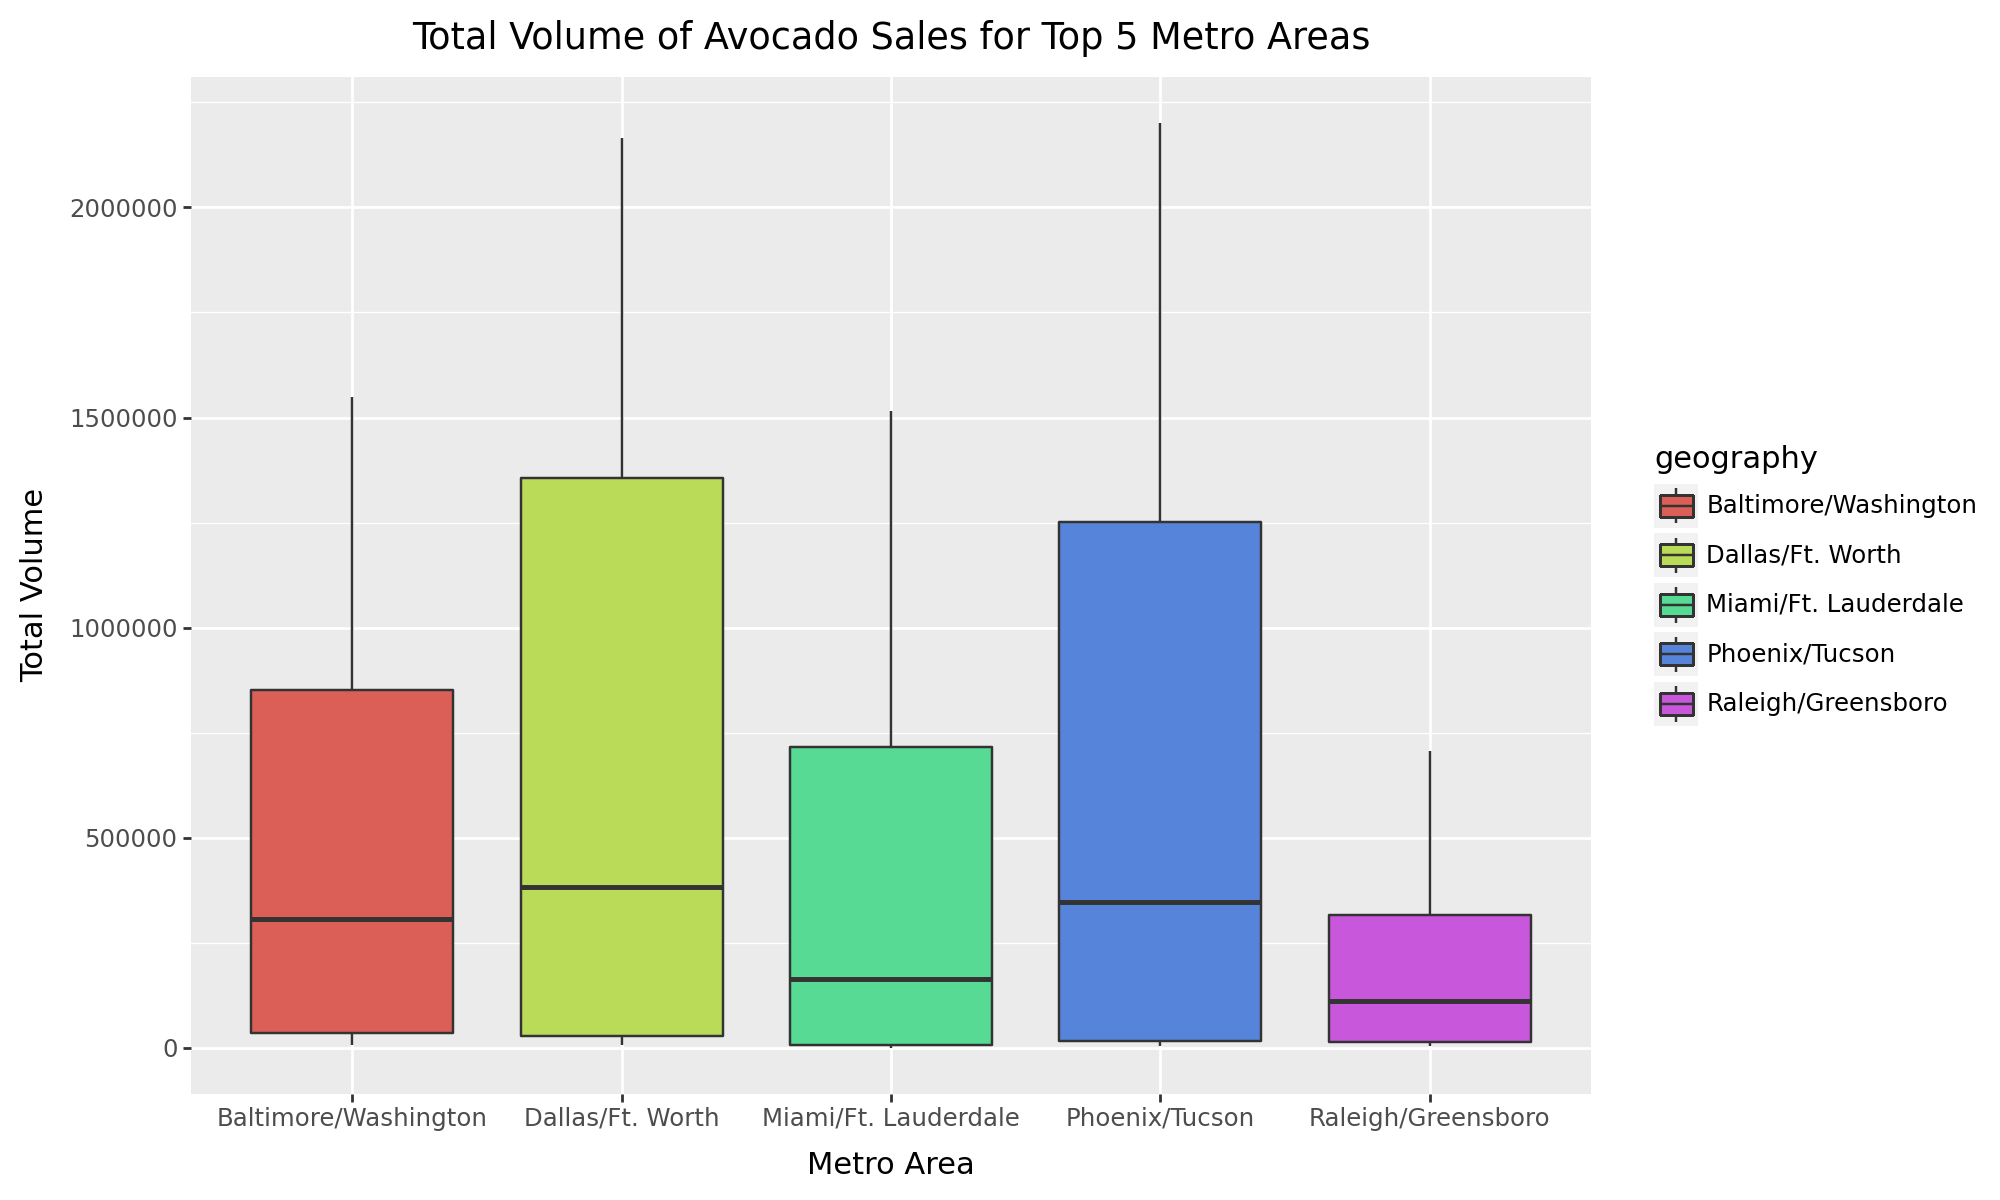

In [17]:
top5_metro = top5_metrovolume.groupby('geography')['total_volume'].sum().sort_values(ascending=False).head(5).index
top5_metrovolume = top5_metrovolume[top5_metrovolume['geography'].isin(top5_metro)]
(ggplot(top5_metrovolume, aes(x='geography', y='total_volume', fill='geography')) +
geom_boxplot() +
labs(title="Total Volume of Avocado Sales for Top 5 Metro Areas", x="Metro Area", y="Total Volume") +
theme(figure_size=(10, 6)))

**Pivoting: only california cities**

In [18]:
ca_cities = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
avocado_clean = avocado_clean[avocado_clean['geography'].isin(ca_cities)]
avocado_clean.head()

,date,average_price,total_volume,small,large,extra large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,city,January,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,city,January,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,city,January,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,city,January,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,city,January,4


In [19]:
price_compare = avocado_clean.groupby(['geography', 'type'])['average_price'].mean().sort_values(ascending=False).reset_index().pivot(index='geography', columns='type', values='average_price')
price_compare["diff"] = price_compare["conventional"] - price_compare["organic"]
price_compare.sort_values(by="diff", ascending=True).head()

type,conventional,organic,diff
geography,,,
San Francisco,1.400490,2.119444,-0.718954
San Diego,1.113856,1.798366,-0.684510
Sacramento,1.295359,1.873856,-0.578497
Los Angeles,1.047124,1.574902,-0.527778


**The greatest difference in average price of avocado for conventional and organic is in San Francisco with a differential of $0.7189**

**Preparing the data and calculating proportions for the bar plot.**

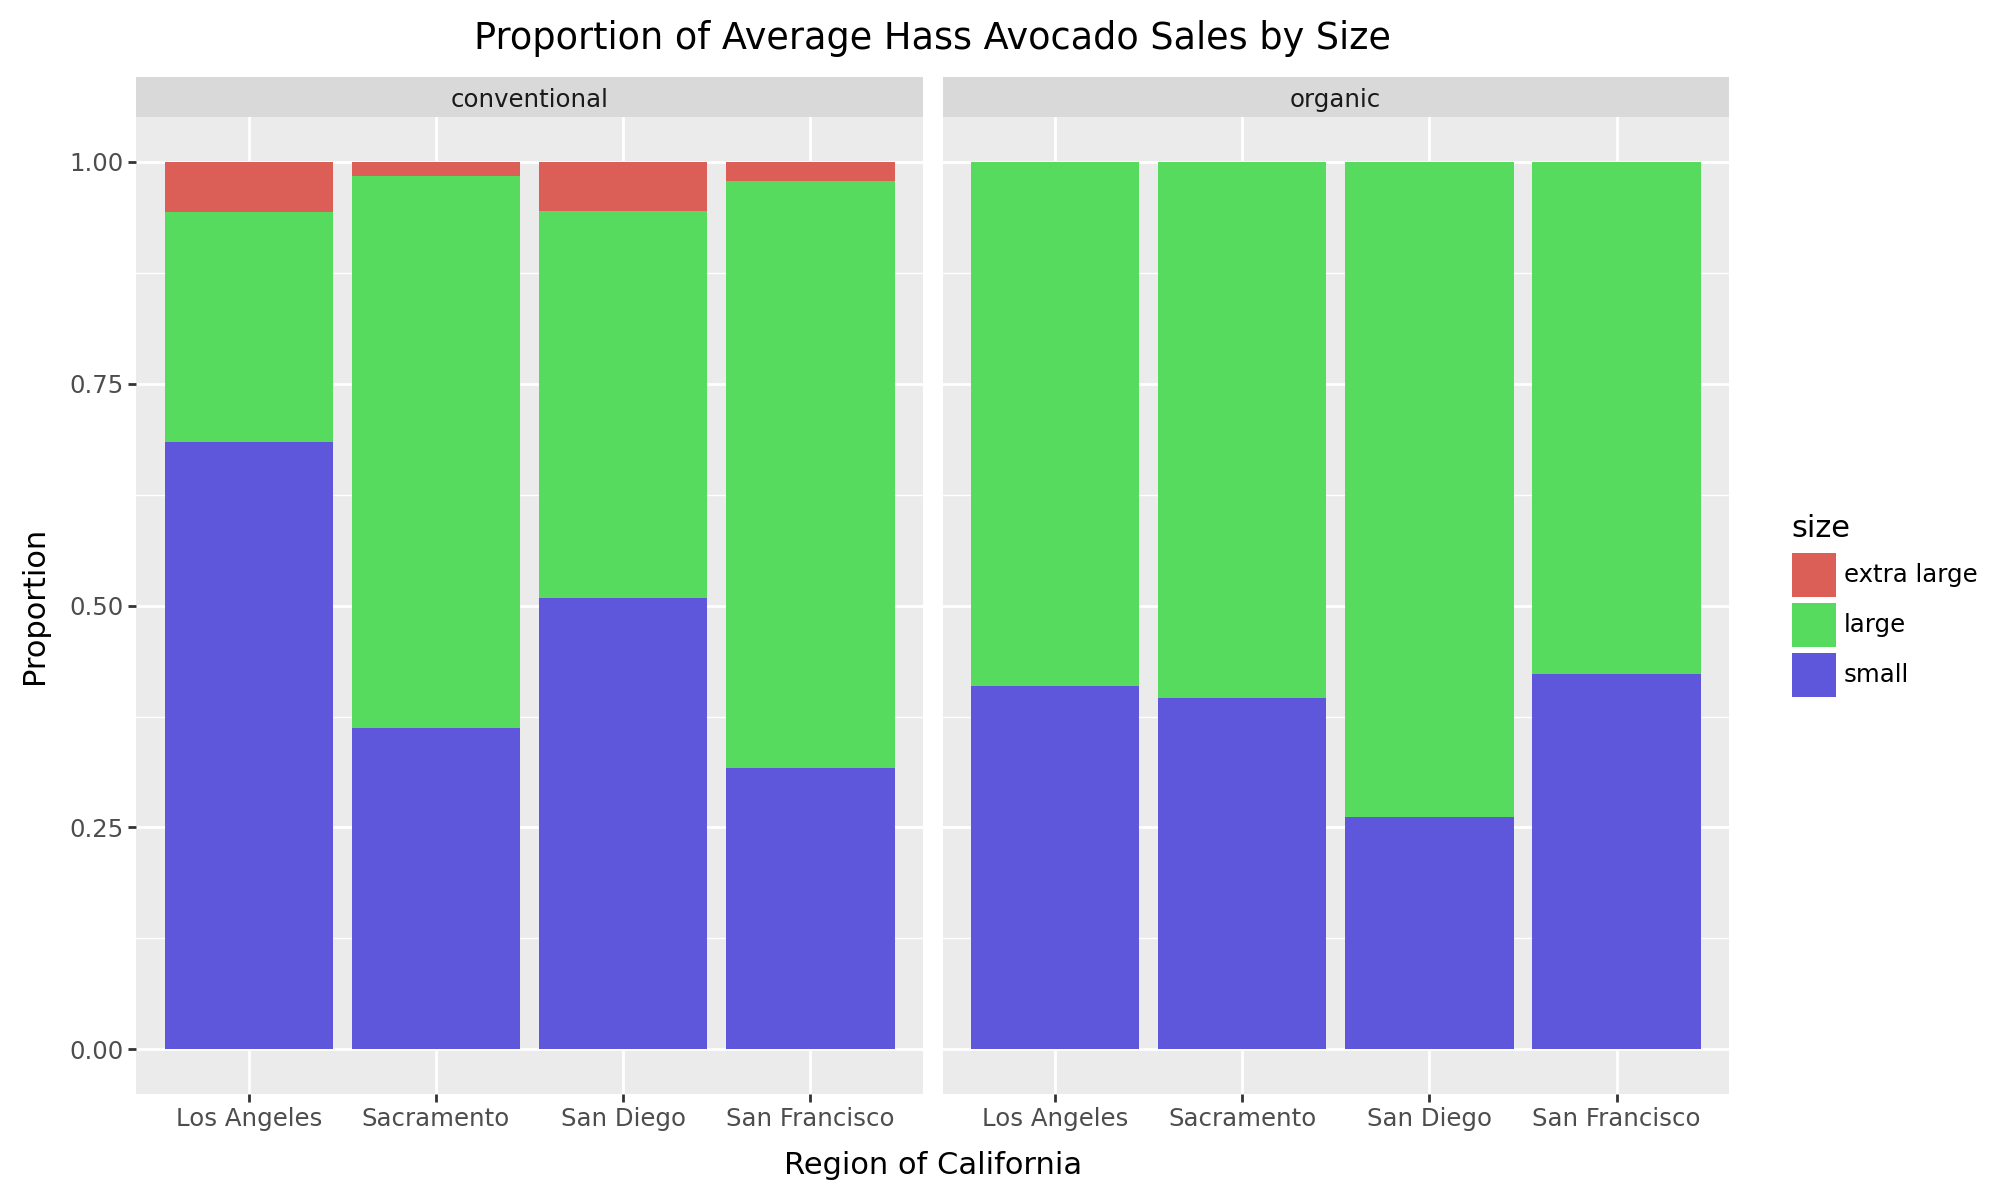

In [20]:
avocado_size = avocado_clean[['geography', 'type', 'small', 'large', 'extra large']].melt(id_vars=['geography', 'type'], var_name='size', value_name='volume')
total_geovolume = avocado_size.groupby(['geography', 'type'])['volume'].sum().reset_index()
total_geovolume = total_geovolume.rename(columns={'volume': 'total_sizevolume'})
avocado_size = pd.merge(avocado_size, total_geovolume, on=['geography', 'type'])
avocado_size['proportion'] = avocado_size['volume'] / avocado_size['total_sizevolume']

(ggplot(avocado_size, aes(x='geography', y='proportion', fill='size')) +
geom_bar(stat='identity') +
facet_wrap('~ type') +
labs(
    title="Proportion of Average Hass Avocado Sales by Size",
    x="Region of California",
    y="Proportion"
  ) +
theme(figure_size=(10, 6)))

**The bar plot shows the proportion of small, large, and extra large avocado sales for conventional and organic types.**

In [31]:
ca_housing = pd.read_csv('/content/ca_housing_prices.csv')
ca_housing.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31
0,102001,0,United States,country,NaN,123266.200632,123483.065395,123752.009633,124328.842231,124992.707395,...,364462.357353,365188.640378,365823.798029,366287.152111,366009.670511,365477.500729,364786.658389,364164.687570,363734.792944,363505.418222
1,394913,1,"New York, NY",msa,NY,220834.762563,221773.185705,222720.300336,224639.521066,226626.940595,...,690755.304890,692575.728852,693669.194915,694977.328807,696695.225717,699159.431275,700949.662026,702443.165533,703629.915468,704429.490778
2,753899,2,"Los Angeles, CA",msa,CA,222015.511375,222841.690769,223942.153841,226131.705683,228526.388970,...,961498.007841,965544.021513,966083.013802,964049.558192,958942.953993,954617.341638,949834.733548,945472.000401,942874.715529,941801.259283
3,394463,3,"Chicago, IL",msa,IL,156057.927247,156202.391427,156477.526001,157161.992446,157985.323252,...,331806.815527,333077.217269,334445.324061,335814.963432,336675.321538,337286.526381,337582.082090,337949.183099,338802.799156,339815.521916
4,394514,4,"Dallas, TX",msa,TX,128589.525231,128646.799455,128712.642038,128883.628311,129109.069031,...,379351.516745,378817.350669,378284.400353,377491.069116,375977.244491,373834.225962,371400.003667,369018.279864,366986.526298,365614.233164


In [32]:
Etract_cities = [
    "Los Angeles, CA",
    "San Francisco, CA",
    "San Diego, CA",
    "Sacramento, CA",
]

In [33]:
Remap_cities = {
    "Los Angeles, CA": "Los Angeles",
    "San Francisco, CA": "San Francisco",
    "San Diego, CA": "San Diego",
    "Sacramento, CA": "Sacramento",
}

In [41]:
date_cols = ca_housing.filter(regex=r"^\d{4}-\d{2}-\d{2}$").columns

ca_housing_filtered_rows = ca_housing[ca_housing["RegionName"].isin(Etract_cities)].copy()
cols_to_melt = [col for col in keep_cols if col != "RegionName"]
ca_housing_selected = ca_housing_filtered_rows[['RegionName'] + cols_to_melt].copy()
ca_housing_selected['region'] = ca_housing_selected['RegionName'].map(Remap_cities)
ca_housing_selected = ca_housing_selected.drop(columns=['RegionName'])
ca_housing_melted = ca_housing_selected.melt(id_vars="region", var_name="date", value_name="ca_housing").copy()
ca_housing_melted["date"] = pd.to_datetime(ca_housing_melted["date"]).dt.to_period("M").dt.to_timestamp()
ca_housing_final = ca_housing_melted.query("date >= '2015-01-01' and date <= '2018-12-31'").copy()
ca_housing = ca_housing_final[["date", "region", "ca_housing"]].sort_values(["region", "date"])

In [44]:
avocado_clean['date'] = pd.to_datetime(avocado_clean['date']).dt.to_period('M').dt.to_timestamp()
merged_data = pd.merge(avocado_clean, ca_housing, left_on=['date', 'geography'], right_on=['date', 'region'], how='inner')
merged_data = merged_data.drop(columns=['region'])
merged_data.head()

,date,average_price,total_volume,small,large,extra large,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day,ca_housing
0,2015-01-01,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,city,January,4,507130.709844
1,2015-01-01,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,city,January,4,507130.709844
2,2015-01-01,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,city,January,4,316032.771108
3,2015-01-01,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,city,January,4,316032.771108
4,2015-01-01,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,city,January,4,456452.566339


Let's explore the relationship between avocado prices and housing prices in the California cities. We will create a scatter plot to visualize this relationship.

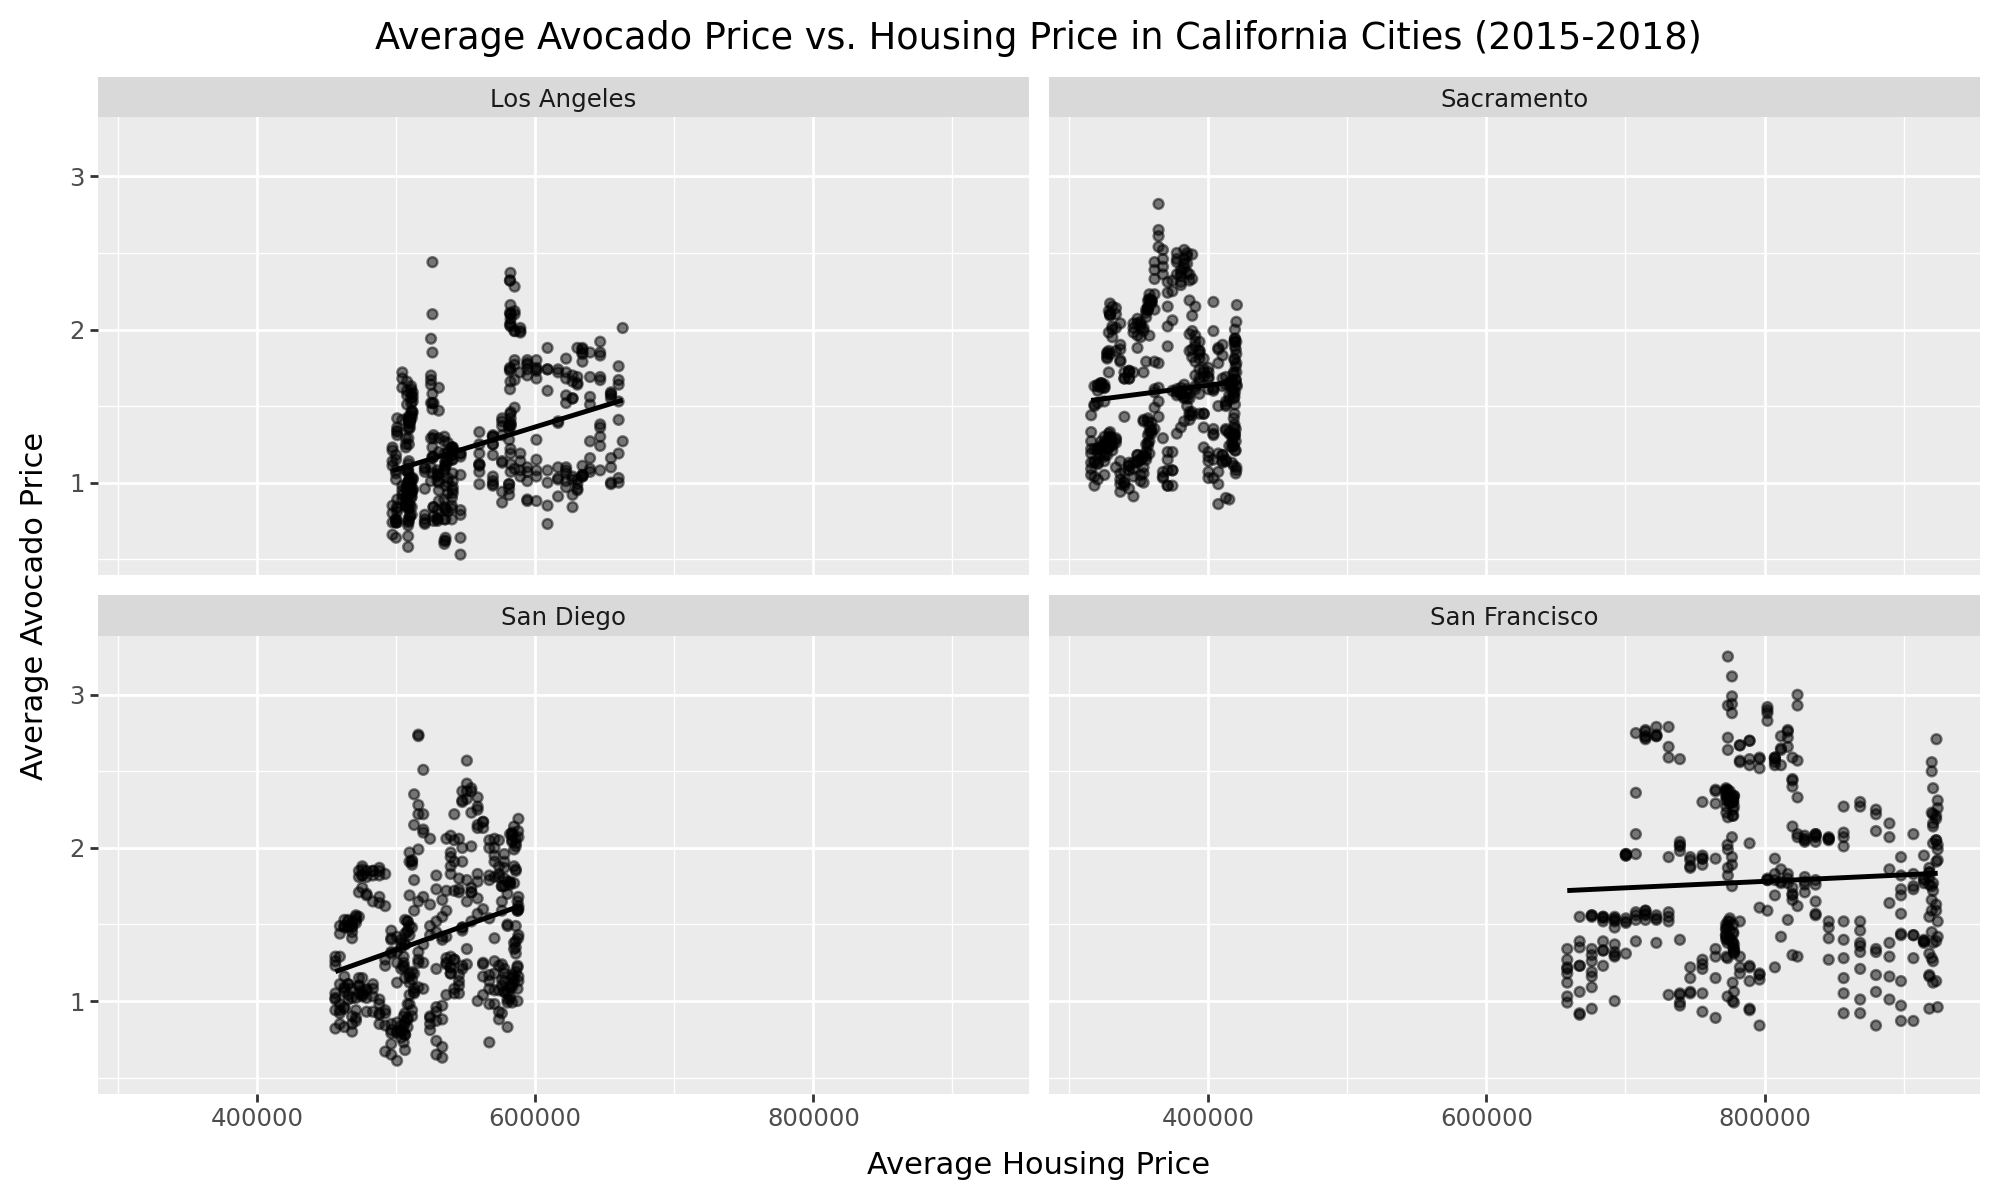

In [55]:
(ggplot(merged_data, aes(x='ca_housing', y='average_price')) +
 geom_point(alpha=0.5) +
 geom_smooth(method='lm', se=False) +
 facet_wrap('~ geography') +
 labs(
     title="Average Avocado Price vs. Housing Price in California Cities (2015-2018)",
     x="Average Housing Price",
     y="Average Avocado Price"
 ) +
 theme(figure_size=(10,6)))

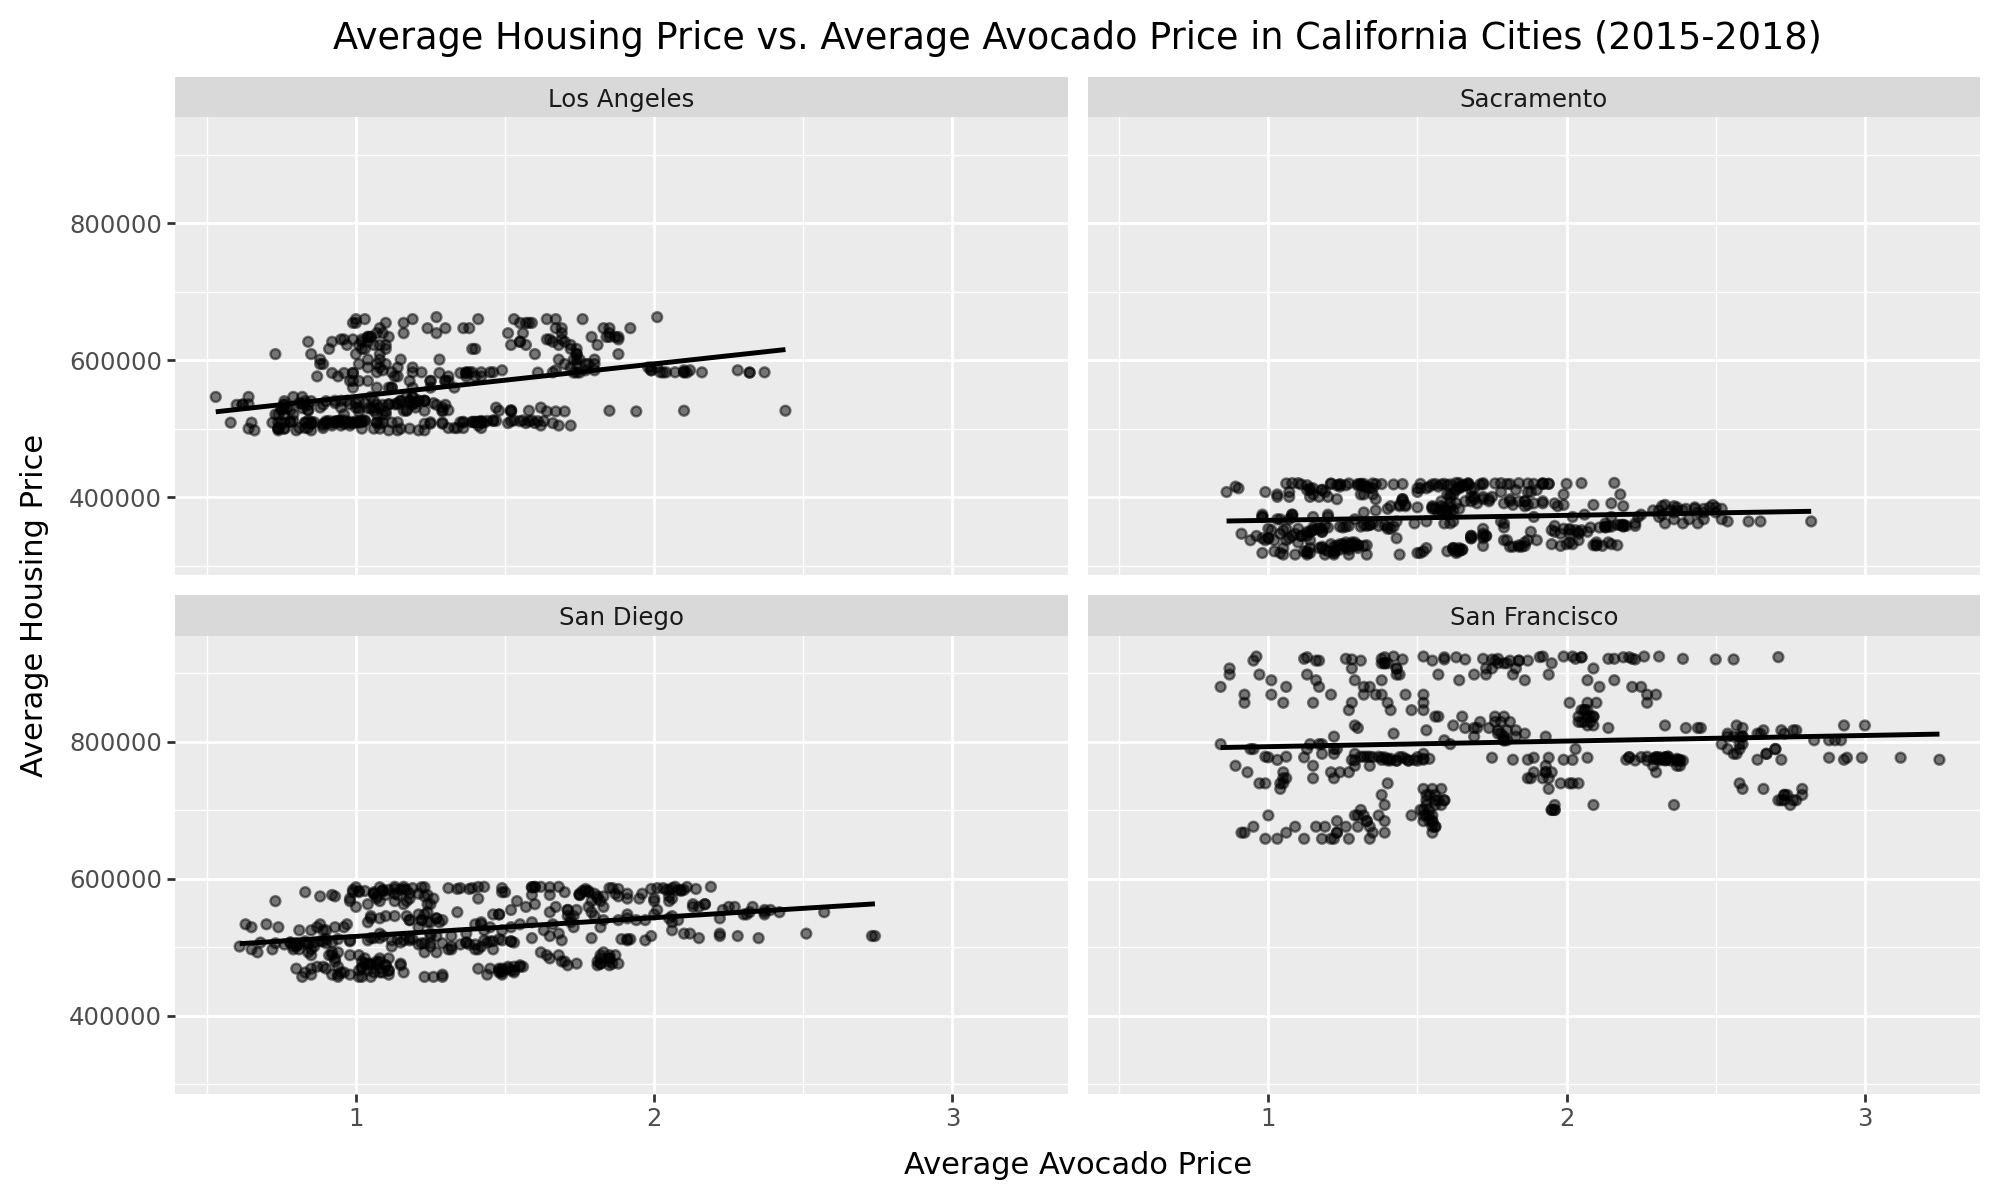

In [60]:
(ggplot(merged_data, aes(x='average_price', y='ca_housing')) +
 geom_point(alpha=0.5) +
 geom_smooth(method='lm', se=False) +
 facet_wrap('~ geography') +
 labs(
     title="Average Housing Price vs. Average Avocado Price in California Cities (2015-2018)",
     x="Average Avocado Price",
     y="Average Housing Price"
 ) +
 theme(figure_size=(10,6)))

**Created 2 plots that flip the parameters of interest. We can tell that in both case the regression indicates there's a positive association between the average price of avocados and the average housing price in respect to the city. In particualr, we can see that San Francisco and Sacramento have the weakest relationship as it regression doesn't seem to be the best fit due to all the variability. Overall, we can conclude that as that the higher price of avocados is associated with higher housing prices for these 4 California cities.**